# Agrupación

En este notebook veremos algunos de los métodos de agrupación o _clustering_ más comunes

*   K-Means
*   Métodos aglomerativos
*   DBSCAN



In [1]:
#
# importación
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'



## K-means


El método K-means, que podemos traducir a _K-promedios_, busca ubicar $K$ puntos (los centros o promedios) de modo que cada uno de esos puntos está en el medio de un grupo de puntos cercanos entre sí (racimo, o _cluster_ en inglés).

Al igual que el libro, vamos a empezar con un ejemplo sintético en 2D, que es donde mejor podemos visualizar y ganar intuición sobre estos métodos.

Antes de pasar al código, cabe remarcar que aquí no hay _validación_, ya que no hay un modelo _correcto_ a priori. Esto no quiere decir que no hayan agrupaciones mejores o peores, pero los criterios para lo anterior son en última instancia arbitrarios y dependen del problema y el objetivo.


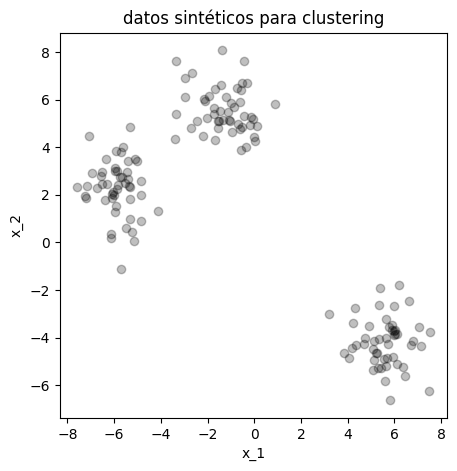

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


etiquetas:
 [2 0 1 1 2 2 0 2 0 0 1 1 2 2 2 2 2 1 0 1 1 2 1 2 0 2 0 2 2 0 2 2 0 0 2 2 2
 1 0 2 1 1 2 2 2 0 1 0 1 0 0 2 0 0 2 2 1 1 0 1 1 2 0 2 0 0 1 2 1 2 2 1 2 1
 1 0 2 0 1 1 2 1 0 0 1 1 1 2 0 2 0 0 1 1 2 1 0 0 1 2 1 0 1 2 0 1 1 0 1 1 0
 1 2 0 1 2 0 1 1 0 2 1 0 0 1 2 0 1 2 2 0 2 0 0 0 0 0 2 1 2 0 0 1 2 0 1 1 0
 2 1]


<ipython-input-3-510ac64505cc>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')


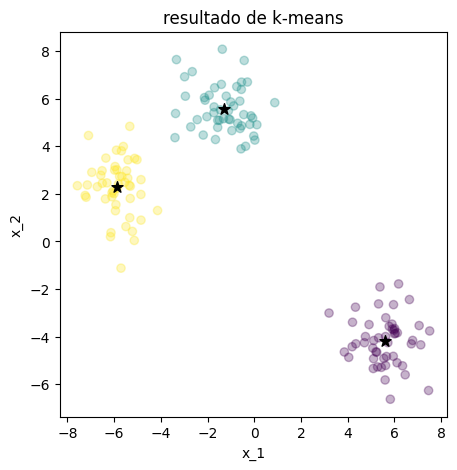

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#
# paréntesis:
# creamos un par de funciones para no repetir código
#
def plot_kmeans(X,kmeans,figname):
  '''
  muestra nubes de puntos con grupos
  asignados por K-means
  '''
  t = kmeans.labels_
  C = kmeans.cluster_centers_
  K = kmeans.n_clusters
  colores = np.arange(K)/(K-1)
  tam = 70 # tamaño del centroide en pixeles

  plt.figure(figsize=(5,5))
  plt.scatter(X[:,0],X[:,1],c=t/K,cmap=cm.viridis,alpha=0.3)
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.title('resultado de k-means')
  plt.savefig(figname)


def plot_puntos_sueltos(X,figname):
  '''
  muestra nubes de puntos sueltos, sin asignación de grupo
  '''
  plt.figure(figsize=(5,5))
  plt.scatter(X[:,0],X[:,1],color='black',alpha=0.25)
  plt.title('datos sintéticos para clustering')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.savefig(figname)
  plt.show()

#
#
# generamos datos sintéticos
#
X, y = make_blobs(random_state=1234,n_samples=150)
#
# veamos los datos
#
plot_puntos_sueltos(X,'puntos_sueltos_1.png')
#
# construimos un modelo de K-means para
# K=3 centroides
#
kmeans = KMeans(n_clusters=3)
#
# ajustamos con TODOS los datos!
#
kmeans = kmeans.fit(X)
#
# etiquetas
#
print('etiquetas:\n',kmeans.labels_)
#
# mostramos el resultado
#
plot_kmeans(X,kmeans,'kmeans_k3.png')

## Comentarios

El escenario del ejemplo anterior es ***inmejorable***:
*   casualmente, los datos se organizan naturalmente en $K=3$ grupos
*   los grupos están bien separados entre sí
*   los grupos tienen una forma más o menos circular

Lo anterior es la situación _ideal_. Como puede sospecharse, muchas cosas pueden salir, y salen, mal en la realidad:
*   los datos no se organizan en $K$ grupos
*   los grupos no están bien separados
*   los grupos tienen formas caprichosas
*   los datos no se organizan claramente en grupos

Veamos ahora unos cuantos ejemplos de lo anterior.

## K demasiado grande

En muchos casos no sabemos cuántos centroides hay. Si $K$ es demasiado grande, pasan cosas como esta:




<ipython-input-3-510ac64505cc>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')


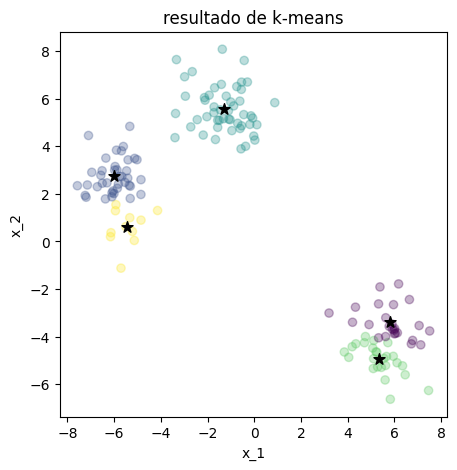

In [4]:
kmeans = KMeans(n_clusters=5,n_init=1) # K = 5
kmeans = kmeans.fit(X)
plot_kmeans(X,kmeans,'kmeans_k5.png')

### Comentarios

Como vemos, dos de los grupos que teníamos se subdividieron erróneamente.


## K-means depende de condiciones iniciales

El algoritmo k-means es iterativo: si uno desea encontrar $K$ centroides, el método comienza ubicando $K$ puntos en el espacio en posiciones _aleatorias_, y luego va aproximando esos puntos hacia los lugares donde hay aglomeraciones.

Desafortunadamente, esto significa que el resultado _final_ de k-means depende _enormemente_ de sus condiciones iniciales, es decir, de las ubicaciones iniciales de los centroides.

En casos muy ideales como el que vimos antes, esto no suele notarse mucho. Veamos qué pasa ahora si cambiamos las condiciones iniciales (con el argumento `random_state`):


<ipython-input-3-510ac64505cc>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')


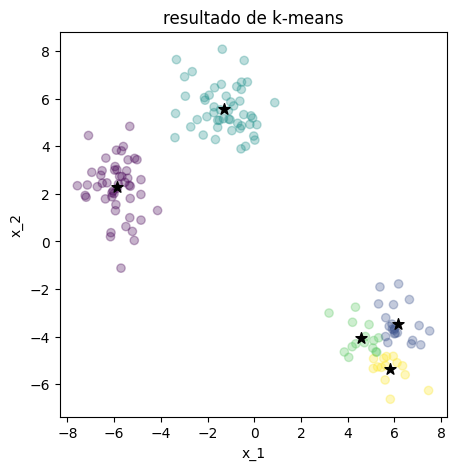

In [5]:
kmeans = KMeans(n_clusters=5,random_state=9802,n_init=1) # K = 5
kmeans = kmeans.fit(X)
plot_kmeans(X,kmeans,'kmeans_k5_b.png')

Para depender _menos_ de las condiciones iniciales, la implementación de `sklearn` repite el algoritmo una cierta cantidad de veces  `n_init`, cada una con distintas inicializaciones, y luego devuelve el mejor agrupamiento según un cierto criterio.

En los ejemplos anteriores nosotros forzamos `n_init=1` para ilustrar la sensibilidad a la inicialización. El valor por defecto, `n_init=10`, produce resultados mucho más consistentes en este caso, pero es algo que en última instancia nunca está garantizado.

(Ejercicio: probar con n_init=X)

## K demasiado chico

Ya vimos que si $K$ es demasiado grande puede pasar que grupos bien unidos terminen siendo divididos en varios subgrupos por nuestro método.

Si por otro lado, $K$ es más chico que la cantidad subyacente de grupos, va a pasar que grupos bien separados terminen unidos.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-510ac64505cc>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')


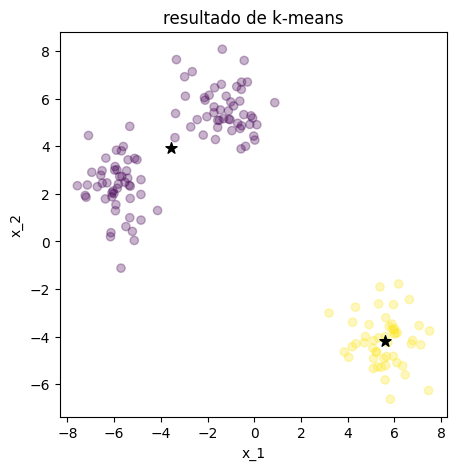

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
plot_kmeans(X,kmeans,'kmeans_k2.png')

## Selección de modelos en K-means: cómo elegir K automáticamente

A pesar de que no tenemos una _verdad_ (_ground truth_) para validar los resultados, sí existen medidas que dan una idea de la calidad del agrupamiento. Intuitivamente, queremos que los grupos estén bien aglomerados, es decir que las distancias entre sus puntos sea pequeña, y a la vez queremos que los grupos estén bien distanciados entre sí.

El criterio más simples toma en cuenta lo primero, midiendo la distancia promedio que hay de los centroides al resto de los puntos en el grupo. Esto es lo que hace la función `score` en K-Means de sklearn.

El problema que hay con esta función es que siempre va a ser menor cuanto más grande sea $K$. Cómo hacemos entonces para determinar cuándo $K$ es suficientemente grande?

No hay una respuesta única. Una _heurística_ muy utilizada es la llamada _slope heuristic_. Simplemente refiere a elegir el último $K$ que produce un aumento _significativo_ en el score. Veamos esto en acción para nuestro problema:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K 1 score  -6062.4 variación relativa  0%
K 2 score  -1073.7 variación relativa 82%
K 3 score   -278.2 variación relativa 74%
K 4 score   -235.5 variación relativa 15%
K 5 score   -200.8 variación relativa 15%
K 6 score   -169.9 variación relativa 15%
K 7 score   -146.2 variación relativa 14%
K 8 score   -130.7 variación relativa 11%
K 9 score   -110.7 variación relativa 15%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


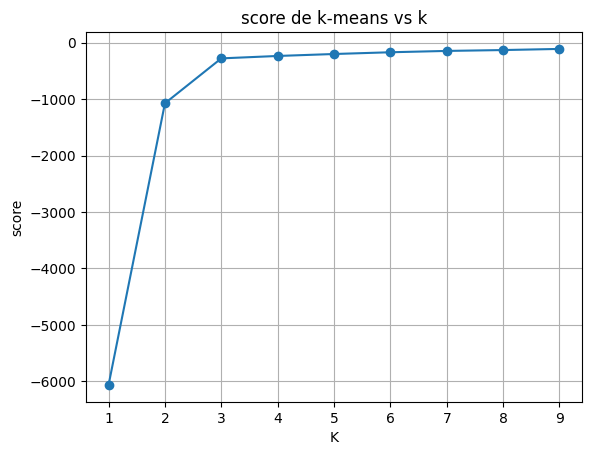

In [7]:
ks = np.arange(1,10)
scores=list()
for K in ks:
  kmeans = KMeans(n_clusters=K)
  kmeans = kmeans.fit(X)
  score = kmeans.score(X)
  if K > 1:
    var = int(np.round(100*(scores[-1]-score)/scores[-1]))
  else:
    var = 0
  print(f'K {K} score {score:8.1f} variación relativa {var:2d}%')
  scores.append(score)

plt.plot(ks,scores,'o-')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('score')
plt.title('score de k-means vs k')
plt.show()

### Preguntas

*   Cuál sería una posible variación mínima para obtener un resultado correcto de $K=3$ mirando la gráfica?
*   Qué problemas identifica en esta heurística? Es objetiva o depende de decisiones arbitrarias?

## Grupos no 'redondos'

K-means se basa en distancias. Esto funciona bien cuando los grupos son 'redondos', es decir, los puntos se aglomeran de manera isométrica (igual para todos lados) en torno a su centroide.

Qué pasa si los grupos son _oblongos_? Veamos otro ejemplo miserable.



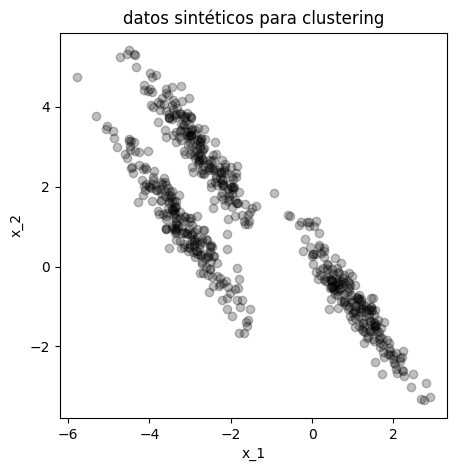

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-510ac64505cc>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')


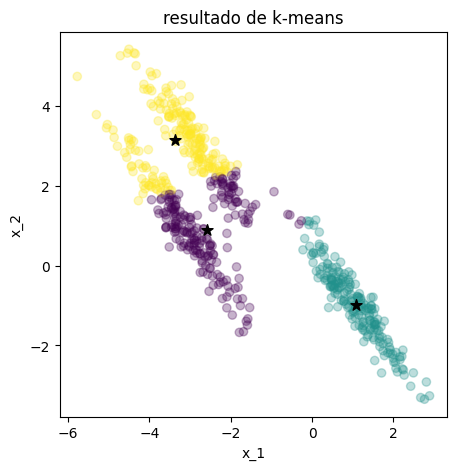

In [8]:
#
# generamos clusters redonditos
#
X, y = make_blobs(random_state=170, n_samples=600)
#
# y los estiramos usando una transformación geométrica
# al azar
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot_puntos_sueltos(X,'puntos_oblongos.png')

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)

plot_kmeans(X,kmeans,'kmeans_oblongos.png')


### Comentarios

Horror. Incluso con la cantidad correcta de grupos, K-means nos dio cualquier cosa. Aquí hay un error de modelado, ya que los grupos no son 'redondos'.
Pero cómo podemos saber de antemano algo así? En general, eso es imposible, pero en muchos casos, nuestro conocimiento del problema, ya sea previo o mediante la inspección visual de los datos, puede ser de gran utilidad para elegir el método o modelo adecuado.

## Formas raras

Para terminar con nuestra galería de horrores vamos a ver un caso extremo de lo anterior que, desafortunadamente, no es nada raro en la práctica: grupos con formas raras o complejas. `sklearn` incluye un conjunto de datos que lo ilustra muy bien


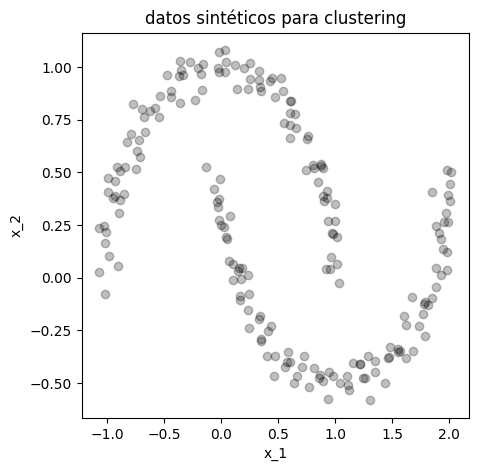

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-510ac64505cc>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1],color='black',s=tam,cmap=cm.viridis,marker='*')


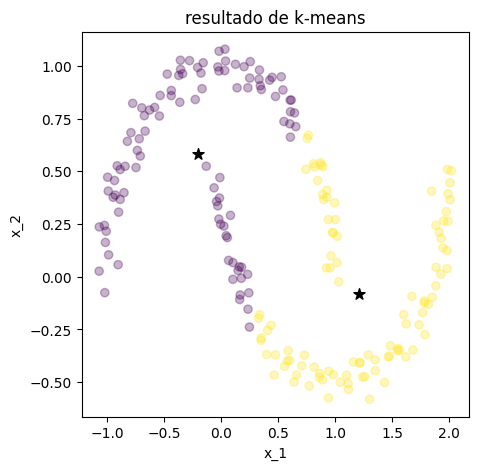

In [9]:
#
# generador de datos 'two moons'
# este dataset genera _dos_ grupos con forma de medialuna
# que están bastante juntos
#
from sklearn.datasets import make_moons
#
# generamos 200 muestras
#
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plot_puntos_sueltos(X,'two_moons.png')
#
# probemos K-means
# ver que, nuevamente, estamos especificando la cantidad _correcta_
# de grupos!
#
kmeans = KMeans(n_clusters=2).fit(X)
plot_kmeans(X,kmeans,'two_moons_kmeans.png')

### Preguntas

*   Fueron bien identificados los grupos?
*   Están bien ubicados los centroides?


# Métodos aglomerativos

K-means es un método muy sencillo; existe hace muchísimos años, y como vimos tiene limitaciones que en muchos casos son serias.

Por suerte existen otros métodos. Algunos de ellos se inspiran en casos como los anteriores para remediar las limitaciones de K-means. Un ejemplo de esto es DBSCAN, que veremos al final de este módulo.

Otros métodos sencillamente tienen un enfoque totalmente distinto a K-means. Entre ellos están los métodos aglomerativos y los métodos divisivos.

Ahora veremos los métodos aglomerativos. Éstos métodos son iterativos que generan una _secuencia de particiones_ (una partición es un conjunto de subconjuntos _disjuntos_ que incluyen a todos los puntos). Los métodos aglomerativos siguen una receta común:

*   En la primera partición se definen $n$ subconjuntos, donde cada subconjunto tiene uno y sólo un punto de la muestra.
*   En cada _iteración_ se combinan los dos subconjuntos más cercanos.
* El algoritmo se detiene al llegar a la cantidad de clusters deseada

Lo que diferencia a un método aglomerativo de otro es la forma en que se definen las distancias entre puntos, y los criterios de agrupamiento. Veamos los que incluye `sklearn`:


*   `ward` : junta los grupos de manera que el incremento en la _varianza_ resultante es _mínima_ (esto es, el score usado en _k-means_)
*   `single` : junta los dos grupos cuya distancia mínima es _mínima_
*   `average`: junta los dos grupos cuya distancia _promedio_ es _mínima_
*   `complete`: junta lo dos clusters cuya distancia _máxima_ entre dos puntos es _mínima_

Aquí la distancia mínima/máxima/promedio se toma entre las distancias de todos los pares de puntos de un grupo y otro.

No es fácil ganar intuición sobre qué implica cáda elección. Vamos a usar la opción por defecto, que es `ward`. Como decíamos, esta opción es consistente con la medida de desempeño usada en k-means.



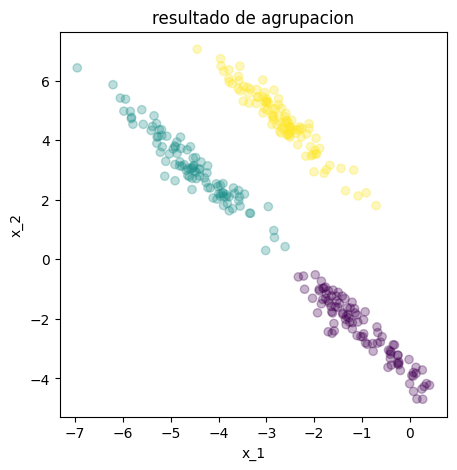

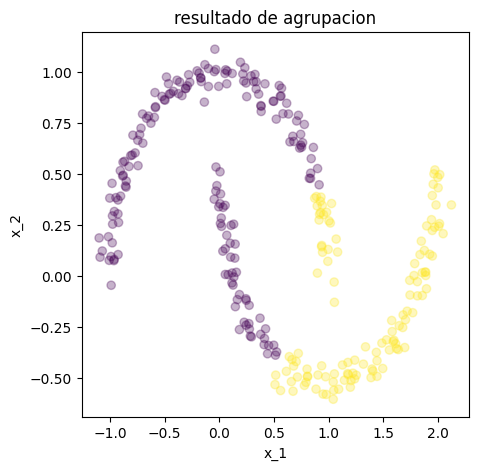

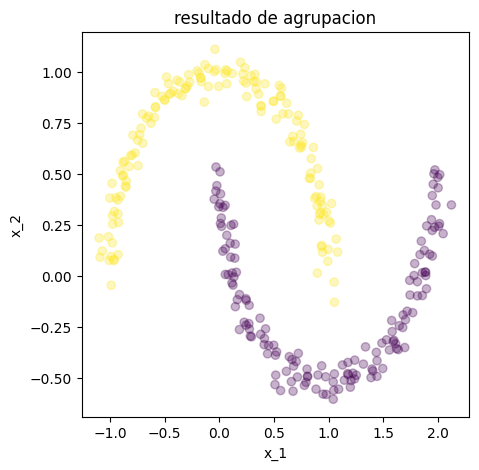

In [10]:
from sklearn.cluster import AgglomerativeClustering


def plot_clusters(X,model,figname):
  '''
  muestra nubes de puntos agrupadas
  no muestra centroides
  '''
  t = model.fit_predict(X)
  K = np.max(t)+1
  colores = np.arange(K)/(K-1)
  tam = 70 # tamaño del centroide en pixeles

  plt.figure(figsize=(5,5))
  plt.scatter(X[:,0],X[:,1],c=t/K,cmap=cm.viridis,alpha=0.3)
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.title('resultado de agrupacion')
  plt.savefig(figname)

#
# probamos con el ejemplo oblongo
#
X, y = make_blobs(n_samples=300,random_state=1)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

model = AgglomerativeClustering(n_clusters=3,linkage='ward')
plot_clusters(X,model,'blobs_k3_ward.png')
#
# probamos con el ejemplo de las dos lunas
#
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)
model = AgglomerativeClustering(n_clusters=2,linkage='ward')
plot_clusters(X,model,'two_moons_k3_ward.png')
#
# a ver con otro criterio...
#
model = AgglomerativeClustering(n_clusters=2,linkage='single')

plot_clusters(X,model,'two_moons_k3_single.png')


## Preguntas

*   Comente sobre el resultado obtenido en los datos oblongos
*   Qué puede decir del criterio de agrupamiento: es importante o no?


## Dendrogramas

Una ventaja de los métodos aglomerativos es que no definen un sólo clustering sino una jerarquía de clusters. Esto puede ser muy útil, por ejemplo, a la hora de construir árboles filogenéticos de especies.

Desafortunadamente `sklearn` no incorpora funciones para generar dendrogramas. El paquete SciPy (del cual sklearn es parte) sí las incorpora, pero su uso es un poco distinto a lo que hemos visto hasta ahora. Abajo vemos un código (tomado de la ayuda de `sklearn`) para dibujar el dendrograma de un modelo aglomerativo

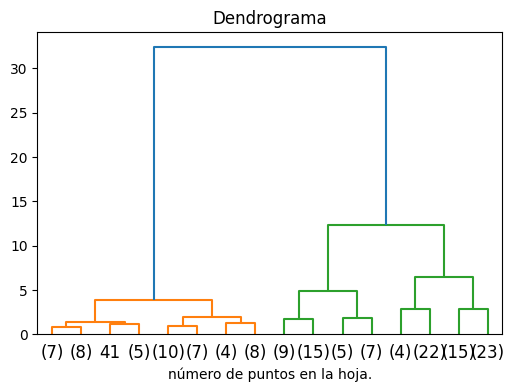

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Dendrograma')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("número de puntos en la hoja.")
plt.show()


# DBSCAN

El nombre viene de "Density-Based Spatial Clustering of Applications with Noise". Este método tiene unas cuantas ventajas respecto a los otros:

*  No requiere conocer la cantidad de clusters _a priori_
*  Se adapta bien a formas de cluster _complejas_
*  Puede descartar puntos aislados
*  Depende menos que k-means de la inicialización

Por otro lado:

*  No tiene centroides
*  No tiene jerarquías
*  Depende (como los otros) de las distancias

La idea del método es simple e intuitiva: busca puntos que estén en zonas _densas_ del espacio, es decir, zonas en donde hay muchos puntos muy cerca. Estos puntos son marcados como puntos _centrales_ (_core_).
Dados esos puntos, el resto de los puntos se clasifican como _periféricos_ si están a una distancia máxima admitida de un punto _core_, o bien se descartan como _ruido_ si no lo están.

Veamos su funcionamiento en las dos lunas:



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


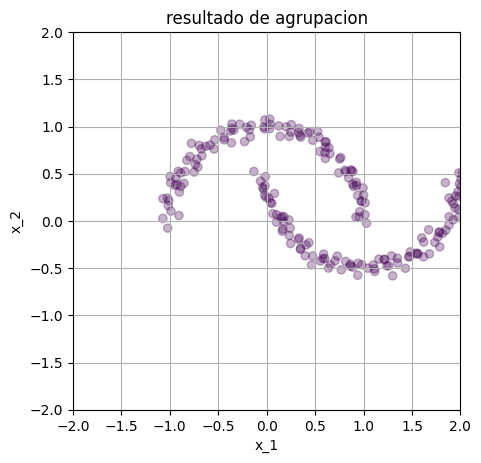

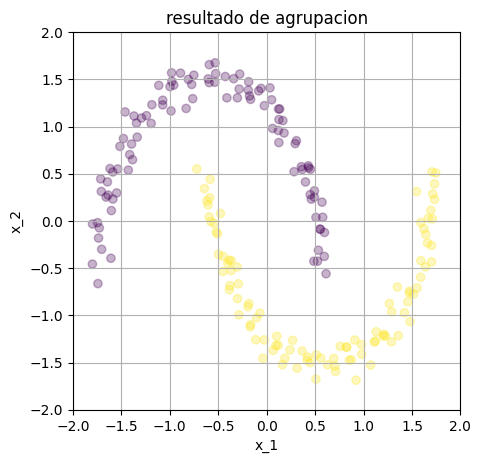

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
#
# a ver cómo funciona con los datos así como vienen
#
model = DBSCAN()
plot_clusters(X,model,'two_moons_dbscan_1.png')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.grid(True)
plt.show()
#
# normalizamos los datos
#
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#
# a ver ahora
#
model = DBSCAN()
plot_clusters(X_scaled,model,'two_moons_dbscan_2.png')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.grid(True)
plt.show()


## Preguntas

*  Por qué puede haber fallado en el primer caso?
